# Da Code

In [1]:
from os import listdir
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
import cv2
import PIL
from PIL import Image
from skimage import color
from skimage import io

from imutils import paths
import pathlib
import numpy as np
import pandas as pd

from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical

from skimage.feature import hog

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

!ls "drive/My Drive/8/dataset"

Mounted at /content/drive
Aug  with_mask	without_mask


In [3]:
print("The number of images labelled 'with mask':",len(os.listdir('drive/My Drive/8/dataset/with_mask')))
print("The number of images labelled 'without mask':",len(os.listdir('drive/My Drive/8/dataset/without_mask')))

The number of images labelled 'with mask': 1930
The number of images labelled 'without mask': 1930


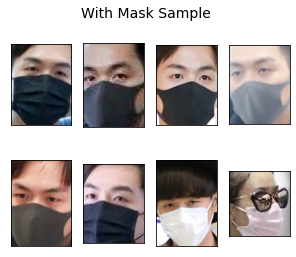

In [4]:
data_with_mask = glob.glob(f"drive/My Drive/8/dataset/with_mask/*")
plt.figure(figsize=(5,4))
for i in range(8):
    plt.suptitle("With Mask Sample", fontsize=14)
    plt.subplot(2,4,i+1) #5 row and 10 column
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mpimg.imread(data_with_mask[i]), cmap=plt.cm.binary)
plt.show()

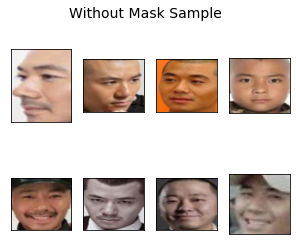

In [5]:
data_without_mask=glob.glob(f"drive/My Drive/8/dataset/without_mask/*")
plt.figure(figsize=(5,4))

for i in range(8):
    plt.suptitle("Without Mask Sample", fontsize=14)
    plt.subplot(2,4,i+1) #5 row and 10 column
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mpimg.imread(data_without_mask[i]), cmap=plt.cm.binary)
    
plt.show()

# Filter image :jpg jpeg png rgba (Don't Touch!!)

In [ ]:
print("The number of images labelled 'with mask' jpg only:",len(os.listdir('drive/My Drive/8/dataset/Aug/with_mask/jpg')))#ignore dir

The number of images labelled 'with mask' jpg only: 1798


History image accepted (scaling):
jpg=1613;jpeg=1695;png=1798;

In [ ]:
from PIL import Image 
import os 

for file jpg

In [ ]:
for file in os.listdir(r'drive/My Drive/8/dataset/with_mask'): 
    if file.endswith(".jpg"):
        img = Image.open('drive/My Drive/8/dataset/with_mask/'+file)
        print(i," ",file," ",img.mode)
        i=i+1
        file_name, file_ext = os.path.splitext(file)
        if img.mode=="RGBA" or img.mode=="P":
          print("-------------skipped coz RGBA or P--------------")
          continue;
        else:
          img.save('drive/My Drive/8/dataset/Aug/with_mask/jpg/{}.jpg'.format(file_name))

567   263.jpg   RGB
568   231.jpg   RGB
569   22.jpg   RGB
570   280.jpg   RGB
571   254.jpg   RGB
572   259.jpg   RGB
573   235.jpg   RGB
574   225.jpg   RGB
575   264.jpg   RGB
576   247.jpg   RGB
577   258.jpg   RGB
578   275.jpg   RGB
579   242.jpg   RGB
580   250.jpg   RGB
581   239.jpg   RGB
582   219.jpg   RGB
583   226.jpg   RGB
584   246.jpg   RGB
585   241.jpg   RGB
586   1_4_16.jpg   RGB
587   256.jpg   RGB
588   244.jpg   RGB
589   257.jpg   RGB
590   1_2_22.jpg   RGB
591   271.jpg   RGB
592   285.jpg   RGB
593   221.jpg   RGB
594   248.jpg   RGB
595   26.jpg   RGB
596   243.jpg   RGB
597   282.jpg   RGB
598   240.jpg   RGB
599   24.jpg   RGB
600   261.jpg   RGB
601   278.jpg   RGB
602   266.jpg   RGB
603   2020-06-23-120158.jpg   RGB
604   20.jpg   RGB
605   234.jpg   RGB
606   223.jpg   RGB
607   286.jpg   RGB
608   217.jpg   RGB
609   245.jpg   RGB
610   283.jpg   RGB
611   49.jpg   RGB
612   296.jpg   RGB
613   301.jpg   RGB
614   291.jpg   RGB
615   48.jpg   RGB
616   

In [ ]:
i=1
for file in os.listdir(r'drive/My Drive/8/dataset/with_mask'): 
    if file.endswith(".jpeg"):
        img = Image.open('drive/My Drive/8/dataset/with_mask/'+file)
        print(i," ",file," ",img.mode)
        i=i+1
        file_name, file_ext = os.path.splitext(file)
        
        img.save('drive/My Drive/8/dataset/Aug/with_mask/jpg/{}.jpg'.format(file_name))

1   Mask226.jpeg   RGB
2   black15.jpeg   RGB
3   black18.jpeg   RGB
4   black11.jpeg   RGB
5   black4.jpeg   RGB
6   black7.jpeg   RGB
7   black8.jpeg   RGB
8   black21.jpeg   RGB
9   with_mask144.jpeg   RGB
10   with_mask132.jpeg   RGB
11   with_mask136.jpeg   RGB
12   with_mask119.jpeg   RGB
13   with_mask139.jpeg   RGB
14   with_mask153.jpeg   RGB
15   with_mask165.jpeg   RGB
16   with_mask157.jpeg   RGB
17   with_mask095.jpeg   RGB
18   with_mask229.jpeg   RGB
19   with_mask225.jpeg   RGB
20   with_mask174.jpeg   RGB
21   with_mask217.jpeg   RGB
22   with_mask357.jpeg   RGB
23   with_mask378.jpeg   RGB
24   with_mask421.jpeg   RGB
25   with_mask635.jpeg   RGB
26   with_mask612.jpeg   RGB
27   with_mask647.jpeg   RGB
28   with_mask616.jpeg   RGB
29   with_mask619.jpeg   RGB
30   with_mask611.jpeg   RGB
31   with_mask652.jpeg   RGB
32   with_mask624.jpeg   RGB
33   with_mask628.jpeg   RGB
34   with_mask626.jpeg   RGB
35   with_mask656.jpeg   RGB
36   with_mask640.jpeg   RGB
37   wit

In [ ]:
i=1
for file in os.listdir(r'drive/My Drive/8/dataset/with_mask'): 
    if file.endswith(".png"):
        img = Image.open('drive/My Drive/8/dataset/with_mask/'+file)
        print(i," ",file," ",img.mode)
        i=i+1
        file_name, file_ext = os.path.splitext(file)
        if img.mode=="RGBA" or img.mode=="P":
          print("-------------skipped coz RGBA or P--------------")
          continue;
        else:
          img.save('drive/My Drive/8/dataset/Aug/with_mask/jpg/{}.jpg'.format(file_name))

1   2465.png   RGB
2   2345.png   RGB
3   279.png   RGB
4   2656.png   RGB
5   2176.png   RGB
6   529.png   RGB
7   357.png   RGB
8   502.png   RGB
9   477.png   RGB
10   51.png   RGB
11   465.png   RGB
12   OIP (1).png   RGB
13   OIP (9).png   RGB
14   Screenshot (262).png   RGBA
-------------skipped coz RGBA or P--------------
15   OIP.png   RGB
16   900.png   RGB
17   Augmented_739_7630163.png   RGB
18   OIP (10).png   RGB
19   Screenshot (259).png   RGBA
-------------skipped coz RGBA or P--------------
20   7.png   RGB
21   Augmented_666_6106924.png   RGB
22   OIP (7).png   RGB
23   Screenshot (252).png   RGBA
-------------skipped coz RGBA or P--------------
24   Screenshot (265).png   RGBA
-------------skipped coz RGBA or P--------------
25   OIP (5).png   RGB
26   Augmented_334_6408301.png   RGB
27   Screenshot (256).png   RGBA
-------------skipped coz RGBA or P--------------
28   86.png   RGB
29   712.png   RGB
30   807.png   RGB
31   6415.png   RGB
32   OIP (2).png   RGB
33   O

# Augmentation(Don't Touch!!)

In [ ]:
!pip install Augmentor
import Augmentor

Without Mask Augmentation

In [ ]:
p = Augmentor.Pipeline (r"drive/My Drive/8/dataset/Aug/without_mask","aug_without_mask","jpg")
# p.zoom(probability=0.3, min_factor=0.8, max_factor=1.5)
p.flip_top_bottom (probability=0.6)
p.flip_left_right(probability=0.7)
p.rotate_random_90(probability=1)
# p.random_brightness (probability=0.3, min_factor=0.3, max_factor=1.2)
# p.random_distortion (probability=1, grid_width=4, grid_height=4, magnitude=8)

In [ ]:
p = Augmentor.Pipeline (r"drive/My Drive/8/dataset/Aug/without_mask","aug_without_mask","jpg")
p.flip_top_bottom (probability=0.6)
p.flip_left_right(probability=0.7)
p.rotate_random_90(probability=1)

In [ ]:
p.sample(5000)

In [ ]:
aug_data_without_mask = glob.glob(f"drive/My Drive/8/dataset/Aug/without_mask/aug_without_mask/*")
plt.figure(figsize=(10,6))
for i in range(18):
    plt.suptitle("Augmented With Mask Sample", fontsize=14)
    plt.subplot(3,6,i+1) #5 row and 10 column
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mpimg.imread(aug_data_without_mask[i]), cmap=plt.cm.binary)
plt.show()

With Mask Augmentation

In [ ]:
print("The number of images labelled 'with mask':",len(os.listdir('drive/My Drive/8/dataset/Aug/with_mask')))

In [ ]:
p = Augmentor.Pipeline (r"drive/My Drive/8/dataset/Aug/with_mask","aug_with_mask","jpg")
p.flip_top_bottom (probability=0.6)
p.flip_left_right(probability=0.7)
p.rotate_random_90(probability=1)

In [ ]:
p.sample(5000)

In [ ]:
aug_data_with_mask = glob.glob(f"drive/My Drive/8/dataset/Aug/with_mask/output/*")
plt.figure(figsize=(10,6))
for i in range(18):
    plt.suptitle("Augmented With Mask Sample", fontsize=14)
    plt.subplot(3,6,i+1) #5 row and 10 column
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mpimg.imread(aug_data_with_mask[i]), cmap=plt.cm.binary)
plt.show()

Info

In [ ]:
print("The number of images labelled 'without mask':",len(os.listdir('drive/My Drive/8/dataset/Aug/without_mask')))
print("The number of images labelled 'aug without mask':",len(os.listdir('drive/My Drive/8/dataset/Aug/dataset_fix/without_mask')))
print("The number of images labelled 'with mask':",len(os.listdir('drive/My Drive/8/dataset/Aug/with_mask')))
print("The number of images labelled 'aug with mask':",len(os.listdir('drive/My Drive/8/dataset/Aug/dataset_fix/with_mask')))
print("Cleaned Image Data + Aug")

In [ ]:
print("The number of images labelled 'with mask':",len(os.listdir('drive/My Drive/8/dataset/Aug/dataset_fix_cleansed/aug_without_mask_v2')))
print("The number of images labelled 'without mask':",len(os.listdir('drive/My Drive/8/dataset/Aug/dataset_fix_cleansed/aug_with_mask_v2')))

The number of images labelled 'with mask': 4550
The number of images labelled 'without mask': 4550


# Preprocessing

In [6]:
imagePaths = list(paths.list_images('drive/My Drive/8/dataset/Aug/dataset_fix/'))#dataset_fix || dataset_fix_cleansed
data = []
labels = []
 
# Melakukan perulangan pada image paths
for imagePath in imagePaths:
 
    # Mengekstrak class label dari file name
    label = imagePath.split(os.path.sep)[-2]
    # Memuat input gambar (320x240) dan melakukan proses
    image = load_img(imagePath, target_size=(320, 240))
    image = img_to_array(image)
    image = preprocess_input(image)
 
    # Mengupdate data dan labels lists, berurutan
    data.append(image)
    labels.append(label)

In [7]:
print("Data Label with Mask: ", labels.count("with_mask"),"& ", data.count("with_mask"));
print("Data Label with Mask: ",labels.count("without_mask"),"& ", data.count("without_mask"));

Data Label with Mask:  5000 &  0
Data Label with Mask:  5000 &  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [8]:
# Melakukan one-hot encoding on the labels
lb = LabelBinarizer()
print(labels)
labels = lb.fit_transform(labels)
print(labels)
print("transform label: 1=without mask;0=with mask")

# Mengkonversi data dan label ke dalam NumPy Arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)#labels
# print(labels)

['without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'withou

In [9]:
data.shape

(10000, 320, 240, 3)

HoG Extraction

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(320, 240, 3)


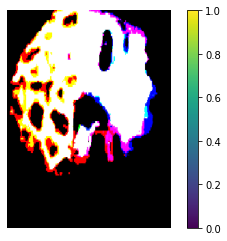

In [10]:
plt.axis("off")
plt.imshow(data[9240])
plt.colorbar()
print(data[9240].shape)

(320, 240)

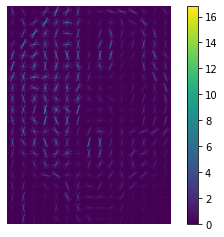

In [11]:
fd, hog_image = hog(data[9240], orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_image)
plt.colorbar()
hog_image.shape

In [12]:
fd_data = []
hog_data = []
for i in data:
  fd, hog_image = hog(i, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True, multichannel=True)
  fd_data.append(fd);hog_data.append(hog_image);

In [13]:
print(len(hog_data))
hog_data = np.array(hog_data, dtype="float32")

10000


# Training & Test

In [28]:
(trainX, testX, trainY, testY) = train_test_split(hog_data, labels,
    test_size=0.1, stratify=labels, random_state=5)

In [29]:
print(len(trainX));print(len(testX));

9000
1000


 validation

In [30]:
#early stopping for validation and the validation data is 0.1(default) from training data
mlp=MLPClassifier(max_iter=100,activation='relu',learning_rate='adaptive', verbose=1, random_state=5,early_stopping=True)
mlp

MLPClassifier(early_stopping=True, learning_rate='adaptive', max_iter=100,
              random_state=5, verbose=1)

In [31]:
print("data train shape: ",trainX.shape, trainY.shape)

data train shape:  (9000, 320, 240) (9000, 1)


In [32]:
#membuat trainX 3d menjadi 2d
nsamples, nx, ny=trainX.shape
d2_trainX=trainX.reshape((nsamples,nx*ny))
#membuat testX 3d menjadi 2d
nsamples, nx, ny=testX.shape
d2_testX=testX.reshape((nsamples,nx*ny))

In [33]:
d2_trainX.shape

(9000, 76800)

In [34]:
model=mlp.fit(d2_trainX,np.ravel(trainY))

Iteration 1, loss = 1.68014473
Validation score: 0.841111
Iteration 2, loss = 0.30904524
Validation score: 0.856667
Iteration 3, loss = 0.24259693
Validation score: 0.908889
Iteration 4, loss = 0.17578315
Validation score: 0.912222
Iteration 5, loss = 0.14909256
Validation score: 0.912222
Iteration 6, loss = 0.14104758
Validation score: 0.917778
Iteration 7, loss = 0.13389216
Validation score: 0.884444
Iteration 8, loss = 0.09686573
Validation score: 0.924444
Iteration 9, loss = 0.07031539
Validation score: 0.935556
Iteration 10, loss = 0.06218450
Validation score: 0.932222
Iteration 11, loss = 0.04859696
Validation score: 0.938889
Iteration 12, loss = 0.04169189
Validation score: 0.935556
Iteration 13, loss = 0.03744329
Validation score: 0.934444
Iteration 14, loss = 0.03181583
Validation score: 0.938889
Iteration 15, loss = 0.02935556
Validation score: 0.927778
Iteration 16, loss = 0.02404248
Validation score: 0.931111
Iteration 17, loss = 0.02381707
Validation score: 0.934444
Iterat

In [35]:
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': True,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 100,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 5,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 1,
 'warm_start': False}

In [36]:
prediction=model.predict(d2_testX)
prediction

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,

In [37]:
print("Accuracy of this model(using data test): ", model.score(d2_testX, testY))

Accuracy of this model(using data test):  0.944


In [38]:
confusion_matrix(testY,prediction)#.argmax(axis=1)

array([[465,  35],
       [ 21, 479]])

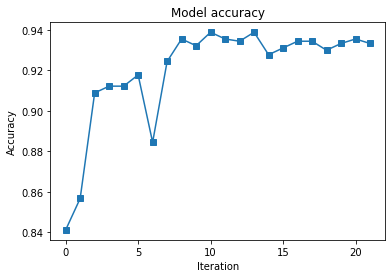

0.9388888888888889


In [39]:
# summarize history for accuracy
# plt.plot(model.n_iter_)
plt.plot(model.validation_scores_, marker='s')
plt.title( 'Model accuracy' )
plt.ylabel( 'Accuracy' )
plt.xlabel( 'Iteration' )
# plt.legend([ 'train' , 'test' ], loc= 'lower right' )
plt.show()
print(model.best_validation_score_)

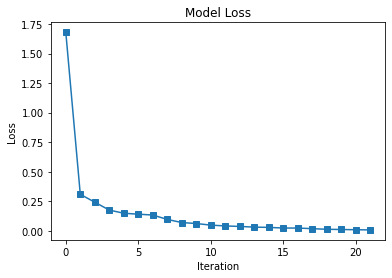

In [40]:
# summarize history for loss
# plt.plot(model.n_iter_)
plt.plot(model.loss_curve_ , marker='s')
plt.title( 'Model Loss' )
plt.ylabel( 'Loss' )
plt.xlabel( 'Iteration' )
# plt.legend([ 'train' , 'test' ], loc= 'lower right' )
plt.show()

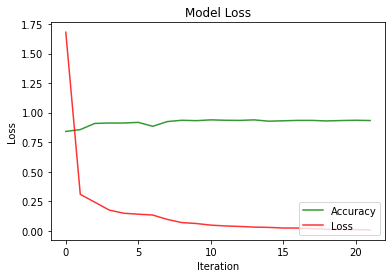

In [41]:
# summarize history for accuracy
plt.plot(model.validation_scores_,color='green', alpha=0.8, label='Accuracy')
plt.plot(model.loss_curve_,color='red', alpha=0.8, label='Loss')
plt.title( 'Model Loss' )
plt.ylabel( 'Loss' )
plt.xlabel( 'Iteration' )
plt.legend(loc= 'lower right' )
plt.show()

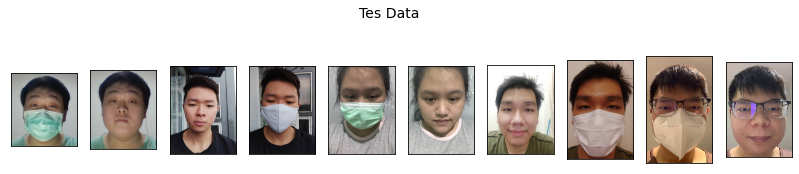

In [42]:
data_tes_mask=glob.glob(f"drive/My Drive/8/data_me/*")
plt.figure(figsize=(14,3))

for i in range(len(data_tes_mask)):
    plt.suptitle("Tes Data", fontsize=14)
    plt.subplot(1,len(data_tes_mask),i+1) #5 row and 10 column
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mpimg.imread(data_tes_mask[i]), cmap=plt.cm.binary)
    
plt.show()

In [43]:
path=list(paths.list_images('drive/My Drive/8/data_me/'))
tes_data=[]
i=0
for imagePath in path:
    i=i+1
    print(i,os.path.basename(imagePath))
    # Memuat input gambar (320x240) dan melakukan proses
    image = load_img(imagePath, target_size=(320, 240))
    print(image)
    image = img_to_array(image)
    image = preprocess_input(image)
 
    # Mengupdate data dan labels lists, berurutan
    tes_data.append(image)

tes_data = np.array(tes_data, dtype="float32")

hog_image=0;hog_data_tes=[];
for i in tes_data:
  fd, hog_image = hog(i, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True, multichannel=True)
  hog_data_tes.append(hog_image)

hog_data_tes = np.array(hog_data_tes, dtype="float32")

nsamples, nx, ny=hog_data_tes.shape
hog_data_tes=hog_data_tes.reshape(nsamples, (nx*ny))
 
print(model.predict(hog_data_tes))

1 with_mask_zoomed.jpg
<PIL.Image.Image image mode=RGB size=240x320 at 0x7F1FA91EAE90>
2 without_mask_zoomed.jpg
<PIL.Image.Image image mode=RGB size=240x320 at 0x7F1FA91EAE90>
3 sen_without_mask.jpg
<PIL.Image.Image image mode=RGB size=240x320 at 0x7F1FA91EAE90>
4 sen_with_mask.jpg
<PIL.Image.Image image mode=RGB size=240x320 at 0x7F1FA91EAE90>
5 cyn_with_mask.jpg
<PIL.Image.Image image mode=RGB size=240x320 at 0x7F1FA9601250>
6 cyn_without_mask.jpg
<PIL.Image.Image image mode=RGB size=240x320 at 0x7F1FA96AB650>
7 lek_without_mask.jpg
<PIL.Image.Image image mode=RGB size=240x320 at 0x7F1FA96AB110>
8 lek_with_mask.jpg
<PIL.Image.Image image mode=RGB size=240x320 at 0x7F1FA96AB590>
9 dmd_with_mask.jpg
<PIL.Image.Image image mode=RGB size=240x320 at 0x7F1FA9716990>
10 dmd_without_mask.jpg
<PIL.Image.Image image mode=RGB size=240x320 at 0x7F1FA918CF90>
[0 1 1 0 0 1 1 0 0 1]


[0 1 1 0 0 1 1 0 0 1]

# tes data wen

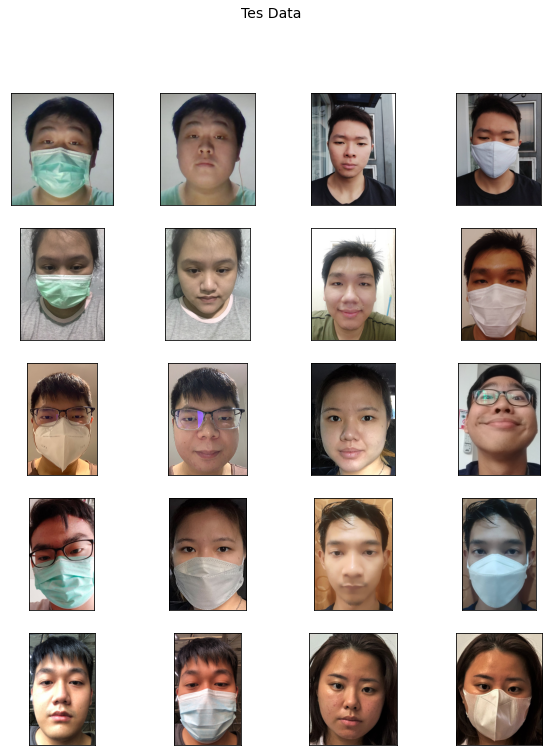

In [ ]:
data_tes_mask=glob.glob(f"drive/My Drive/8/data_me/*")
plt.figure(figsize=(10,12))

for i in range(len(data_tes_mask)):
    plt.suptitle("Tes Data", fontsize=14)
    plt.subplot(5,4,i+1) #5 row and 4 column
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mpimg.imread(data_tes_mask[i]), cmap=plt.cm.binary)
    
plt.show()

In [ ]:
path=list(paths.list_images('drive/My Drive/8/data_me/'))
tes_data=[]
i=0
for imagePath in path:
    i=i+1
    print(i,os.path.basename(imagePath))
    # Memuat input gambar (320x240) dan melakukan proses
    image = load_img(imagePath, target_size=(320, 240))
    #print(image)
    image = img_to_array(image)
    image = preprocess_input(image)
 
    # Mengupdate data dan labels lists, berurutan
    tes_data.append(image)

tes_data = np.array(tes_data, dtype="float32")

hog_image=0;hog_data_tes=[];
for i in tes_data:
  fd, hog_image = hog(i, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True, multichannel=True)
  hog_data_tes.append(hog_image)

hog_data_tes = np.array(hog_data_tes, dtype="float32")

nsamples, nx, ny=hog_data_tes.shape
hog_data_tes=hog_data_tes.reshape(nsamples, (nx*ny))

print(model.predict(hog_data_tes))
result=model.predict(hog_data_tes)

result_label=[]
for i in result:
    if result[i]==1:
      result_label.append("without_mask")
    else :
      result_label.append("with_mask")
for i in range(len(result_label)):
  print(i+1, result_label[i])



1 with_mask_zoomed.jpg
2 without_mask_zoomed.jpg
3 sen_without_mask.jpg
4 sen_with_mask.jpg
5 cyn_with_mask.jpg
6 cyn_without_mask.jpg
7 lek_without_mask.jpg
8 lek_with_mask.jpg
9 dmd_with_mask.jpg
10 dmd_without_mask.jpg
11 rea_without_mask.jpg
12 roy_without_mask.jpg
13 roy_with_mask.jpg
14 rea_with_mask.jpg
15 ric_without_mask.jpg
16 ric_with_mask.jpg
17 pan_without_mask.jpg
18 pan_with_mask.jpg
19 bel_without_mask.jpg
20 bel_with_mask.jpg
[0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1]
1 with_mask
2 without_mask
3 without_mask
4 with_mask
5 with_mask
6 without_mask
7 without_mask
8 with_mask
9 with_mask
10 without_mask
11 without_mask
12 without_mask
13 without_mask
14 with_mask
15 without_mask
16 with_mask
17 without_mask
18 with_mask
19 without_mask
20 without_mask


Actual
[0 1 1 0 0 1 1 0 0 1 || 1 1 0 0 1 0 1 0 1 0]